In [0]:
import csv
import numpy as np
import matplotlib.pyplot as plt


test_data = []
#기대되는 output
test_h = []
train_data = []
train_h = []

with open('/content/drive/My Drive/AssignmentFolder/Assignment04/data_test.csv', newline='') as myfile:
    reader  = csv.reader(myfile, delimiter=',')
    ct = 1 
    for i in reader:
        j = []
        j.append(1.0)
        j.append(float(i[0]))
        j.append(float(i[1]))
        j.append(float(i[2]))
        test_data.append(j)
        test_h.append(float(i[3]))
        ct += 1

with open('/content/drive/My Drive/AssignmentFolder/Assignment04/data_train.csv', newline='') as myfile:
    reader  = csv.reader(myfile, delimiter=',')
    ct = 1 
    for i in reader:
        j = []
        j.append(1.0)
        j.append(float(i[0]))
        j.append(float(i[1]))
        j.append(float(i[2]))
        train_data.append(j)
        train_h.append(float(i[3]))
        ct += 1

t0 = 0.0
t1 = 0.0
t2 = 0.0
t3 = 0.0
theta = np.array([t0, t1, t2, t3])

pre = np.dot(test_data, np.transpose(theta))

test_data = np.array(test_data)

test_h = np.array(test_h)


339


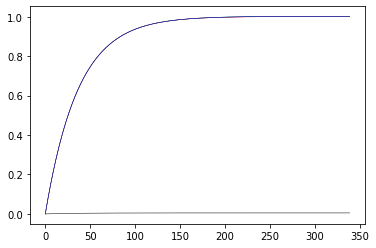

<Figure size 720x720 with 0 Axes>

In [68]:
t0_list = []
t1_list = []
t2_list = []
t3_list = []

i = 0

#training error
J_tr = []
#testing error
J_ts = []

X = np.transpose(test_data)[1]
Y = np.transpose(test_data)[2]
Z = np.transpose(test_data)[3]

t0 = 0.0
t1 = 0.0
t2 = 0.0
t3 = 0.0
theta = np.array([t0, t1, t2, t3])

#step size
a = 0.0000003

#standard convergence
cvg = 0.000000000000001

while 1:
  h = np.dot(train_data,theta.T) - train_h
  J = np.mean(h ** 2) / 2
  
  t0 = theta[0]
  t1 = theta[1]
  t2 = theta[2]
  t3 = theta[3]
  
  theta[0] = t0 - np.mean(h) * a
  theta[1] = t1 - np.mean(h * X) * a
  theta[2] = t2 - np.mean(h * Y) * a
  theta[3] = t3 - np.mean(h * Z) * a

  J_tr.append(J)
  t0_list.append(t0)
  t1_list.append(t1)
  t2_list.append(t2)
  t3_list.append(t3)

  if pow((t0 - theta[0]), 2) < cvg or pow((t1 - theta[1]), 2) < cvg or pow((t2 - theta[2]), 2) < cvg or pow((t3 - theta[3]), 2) < cvg:
    break
  i += 1
    

print(i)
t0_line = plt.plot(t0_list)
t1_line = plt.plot(t1_list)
t2_line = plt.plot(t2_list)
t3_line = plt.plot(t3_list)
plt.setp(t0_line, color = 'k', linewidth = 0.5)
plt.setp(t1_line, color = 'r', linewidth = 0.5)
plt.setp(t2_line, color = 'g', linewidth = 0.5)
plt.setp(t3_line, color = 'b', linewidth = 0.5)

plt.figure(figsize = (10, 10))
plt.show()

408


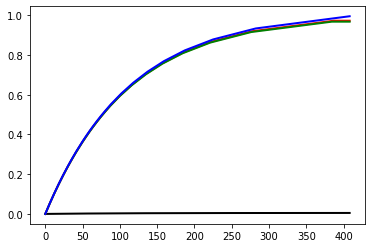

In [50]:
t0_list = []
t1_list = []
t2_list = []
t3_list = []

i = 0

#training error
J_tr = []
#testing error
J_ts = []

X = np.transpose(train_data)[1]
Y = np.transpose(train_data)[2]
Z = np.transpose(train_data)[3]

t0 = 0.0
t1 = 0.0
t2 = 0.0
t3 = 0.0

theta = np.array([t0, t1, t2, t3], dtype = np.float16)

#step size
learning_rate = 0.0000001


while 1:
    
    h = np.dot(train_data,theta.T) - train_h
    J = np.mean(h ** 2) / 2
    J_tr.append(J)

    t0 = theta[0]
    t1 = theta[1]
    t2 = theta[2]
    t3 = theta[3]

    t0_list.append(t0)
    t1_list.append(t1)
    t2_list.append(t2)
    t3_list.append(t3)

    theta[0] -= np.mean(h) * a
    theta[1] -= np.mean(h * X) * a
    theta[2] -= np.mean(h * Y) * a
    theta[3] -= np.mean(h * Z) * a

    if t0 == theta[0] and t1 == theta[1] and t2 == theta[2] and t3 == theta[3]: #when values are convergence break
        break
    i += 1
    
    if i % 100000 == 0:
        print(t0, t1, t2, t3)
    if i > 1000000:
        break
    
    
print(i)
t0_line = plt.plot(t0_list)
t1_line = plt.plot(t1_list)
t2_line = plt.plot(t2_list)
t3_line = plt.plot(t3_list)

plt.setp(t0_line, color = 'k', linewidth = 2.0)
plt.setp(t1_line, color = 'r', linewidth = 2.0)
plt.setp(t2_line, color = 'g', linewidth = 2.0)
plt.setp(t3_line, color = 'b', linewidth = 2.0)
plt.show()

408


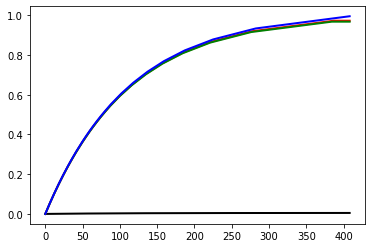

In [51]:
t0_list = []
t1_list = []
t2_list = []
t3_list = []

i = 0

#training error
J_tr = []
#testing error
J_ts = []

X = np.transpose(train_data)[1]
Y = np.transpose(train_data)[2]
Z = np.transpose(train_data)[3]

t0 = 0.0
t1 = 0.0
t2 = 0.0
t3 = 0.0

theta = np.array([t0, t1, t2, t3], dtype = np.float16)

#step size
learning_rate = 0.0000001


while 1:
    
    h = np.dot(train_data,theta.T) - train_h
    J = np.mean(h ** 2) / 2
    J_tr.append(J)

    t0 = theta[0]
    t1 = theta[1]
    t2 = theta[2]
    t3 = theta[3]

    t0_list.append(t0)
    t1_list.append(t1)
    t2_list.append(t2)
    t3_list.append(t3)

    theta[0] -= np.mean(h) * learning_rate
    theta[1] -= np.mean(h * X) * learning_rate
    theta[2] -= np.mean(h * Y) * learning_rate
    theta[3] -= np.mean(h * Z) * learning_rate

    if t0 == theta[0] and t1 == theta[1] and t2 == theta[2] and t3 == theta[3]: #when values are convergence break
        break
    i += 1
    
    if i % 100000 == 0:
        print(t0, t1, t2, t3)
    if i > 1000000:
        break
    
    
print(i)
t0_line = plt.plot(t0_list)
t1_line = plt.plot(t1_list)
t2_line = plt.plot(t2_list)
t3_line = plt.plot(t3_list)

plt.setp(t0_line, color = 'k', linewidth = 2.0)
plt.setp(t1_line, color = 'r', linewidth = 2.0)
plt.setp(t2_line, color = 'g', linewidth = 2.0)
plt.setp(t3_line, color = 'b', linewidth = 2.0)
plt.show()